##  *Client Subscription Prediction*

## Business Understanding 
##### *Problem Statement*

The goal is to improve the success rate of direct marketing campaigns by identifying factors that influence a client's decision to subscribe to a term deposit. This involves understanding client demographics, campaign characteristics, and historical engagement.

##### *Business Objective*

Increase Conversion Rates: Identify clients more likely to subscribe to a term deposit to optimize marketing efforts.

Resource Allocation: Minimize unnecessary calls to unlikely prospects, reducing costs.

Customer Insights: Gain a deeper understanding of client profiles and preferences for future campaigns.

##### *Key Business Questions*

1. Which client demographics (e.g., age, job, marital status, education) are associated with a higher likelihood of subscribing to a term deposit?

2. How do campaign-related factors (e.g., number of calls, duration of contact) impact conversion?
3. What role does previous engagement and its outcome play in current campaign success?
4. Can we predict the likelihood of subscription   based on client and campaign data?

#### *Hypothesis Statement*:
#### H₀ (Null Hypothesis):
Client characteristics (e.g., age, job, marital status, education), financial details, and campaign attributes do not significantly influence the likelihood of subscribing to a term deposit.

#### H₁ (Alternative Hypothesis):
Client characteristics, financial details, and campaign attributes significantly influence the likelihood of subscribing to a term deposit.

## *Data Understanding*

### *Key Features*

##### *Client Demographics:*

##### Age (numeric): 
Provides insights into the age distribution of subscribers.
Job (categorical): Employment type may influence financial behavior.
Marital Status (categorical): Indicates household financial decisions.
Education Level (categorical): Reflects financial literacy and potential income levels.

#### Financial Information:

Default (binary): Indicates credit risk.
Balance (numeric): Average yearly balance offers a financial capability metric.
Housing Loan and Personal Loan (binary): Reflects current financial obligations.

#### Campaign Details:

Contact Method (categorical): Effectiveness of communication channels.
Day and Month of Contact: Timing trends for successful engagements.
Duration of Last Contact: Directly correlated with success (as longer calls often indicate interest).
Number of Contacts in Campaign (numeric): May indicate persistence levels.

#### Historical Campaign Data:

Days Since Last Contact (pdays): Recency of prior engagements.
Previous Contacts (previous): Frequency of earlier interactions.
Outcome of Previous Campaign (poutcome): Past success or failure trends.

#### Target Variable:

y (binary): Indicates whether the client subscribed to the term deposit (yes or no).


#### *Success Criteria*  
A Predictive model with high accuracy, precision and recall for identifying potential Subscriber 

###  Import Libraries

In [2]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

#statistics libraries 
from scipy import stats
import statistics as stat
from scipy.stats import chi2_contingency,mannwhitneyu

#machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest ,mutual_info_classif
from sklearn.metrics import auc,roc_curve

import joblib 
import os


# hide warning
import warnings
warnings.filterwarnings('ignore')



In [3]:
# Load dataset
train_data= pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Predictive-Analysis-for-Client-Subscription/Data/bank-full.csv', delimiter=';')
train_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train_df = pd.DataFrame(train_data)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
test_data= pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Predictive-Analysis-for-Client-Subscription/Data/bank.csv', delimiter=';')
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Data Quality Assessment 
##### Exploratory Analysis

In [6]:
# for train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
train_df.duplicated().sum()


np.int64(0)

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
# print out columns
columns =train_df.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
#checking for unique values
for column in columns:
    print(f"{column}")
    print(f"There are {train_df[column].nunique()} unique values")
    print(f'{train_df[column].unique()}')
    print('-' * 50)

age
There are 77 unique values
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------------
job
There are 12 unique values
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
marital
There are 3 unique values
['married' 'single' 'divorced']
--------------------------------------------------
education
There are 4 unique values
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
default
There are 2 unique values
['no' 'yes']
--------------------------------------------------
balance
There are 7168 unique values
[ 2143    29     2 ...  8205 14204 16353]
------------------------

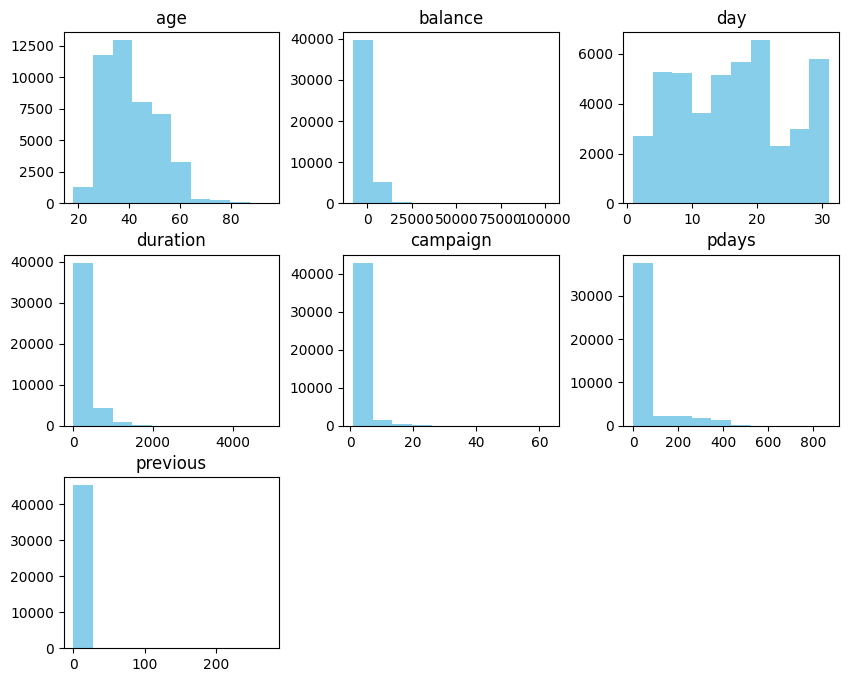

In [12]:
# visualizing the distribution of the numeric columns
train_df.hist(figsize=(10,8),grid=False,color='skyblue')
plt.show()

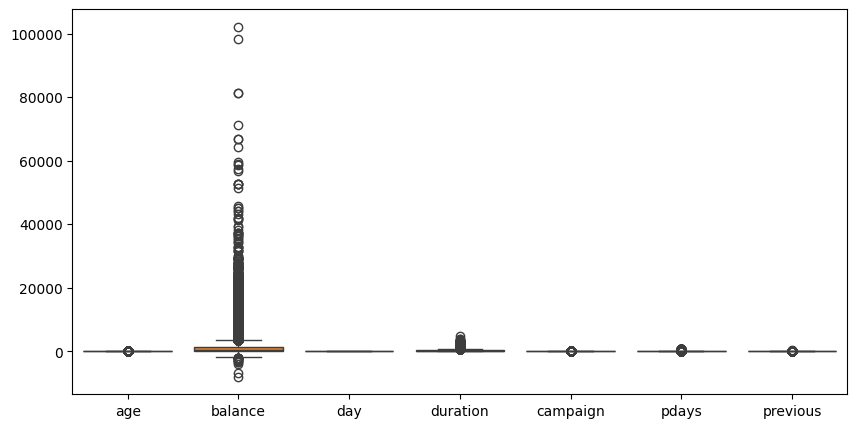

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(train_df)
plt.show()

Column: job
Counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
Percentages:
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64




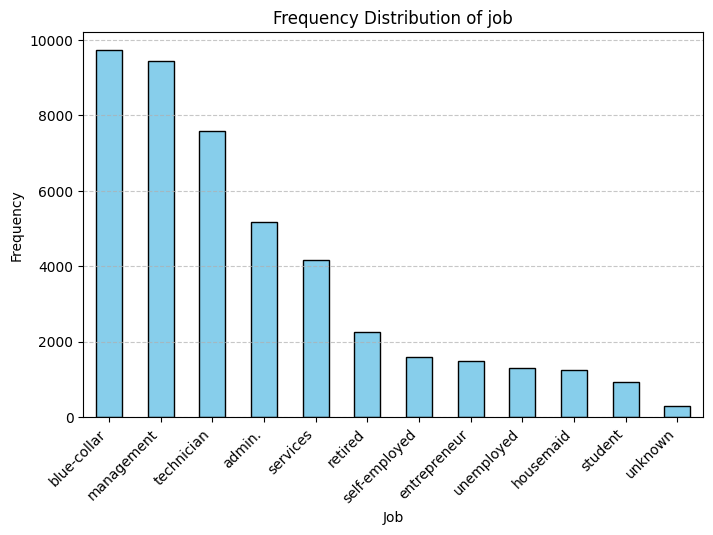

Column: marital
Counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
Percentages:
marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64




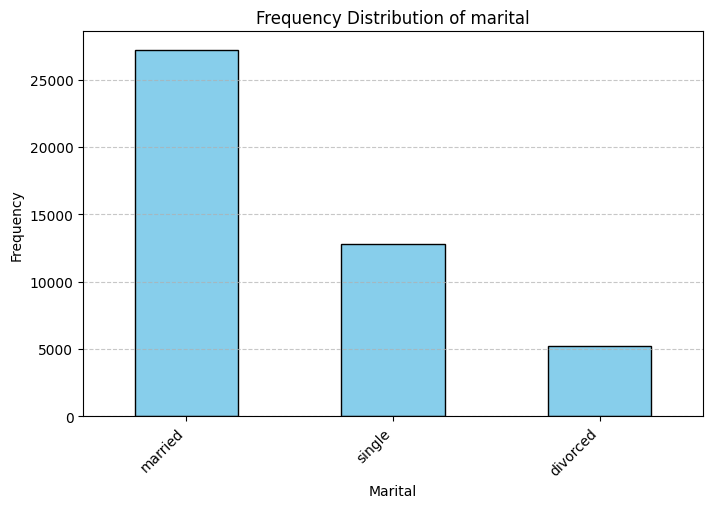

Column: housing
Counts:
housing
yes    25130
no     20081
Name: count, dtype: int64
Percentages:
housing
yes    55.583818
no     44.416182
Name: proportion, dtype: float64




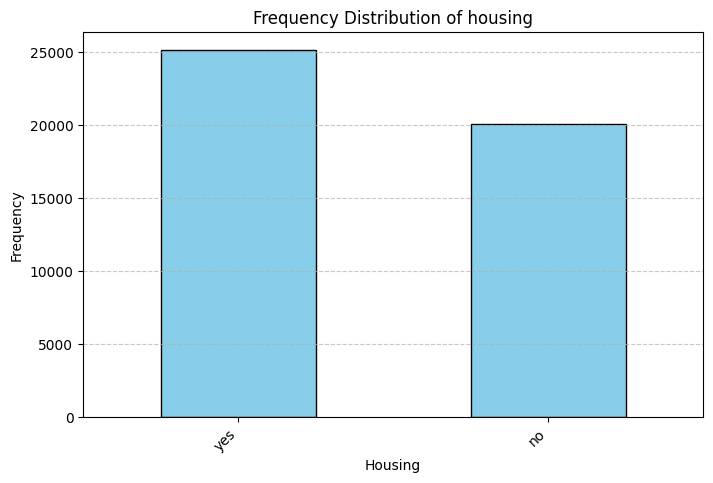

Column: loan
Counts:
loan
no     37967
yes     7244
Name: count, dtype: int64
Percentages:
loan
no     83.977351
yes    16.022649
Name: proportion, dtype: float64




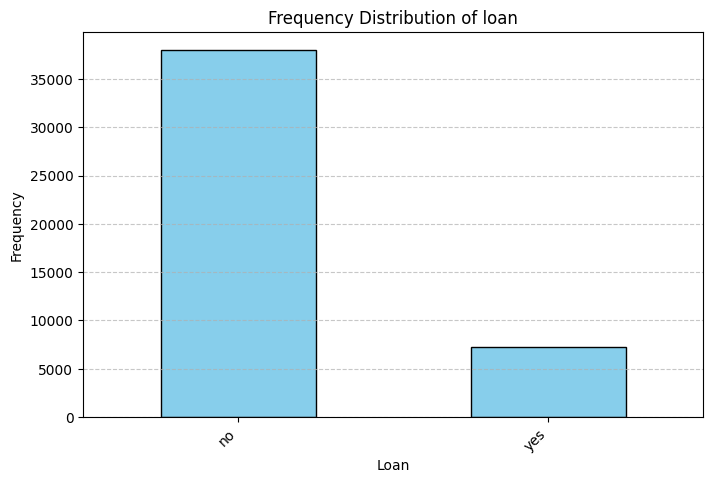

Column: contact
Counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
Percentages:
contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64




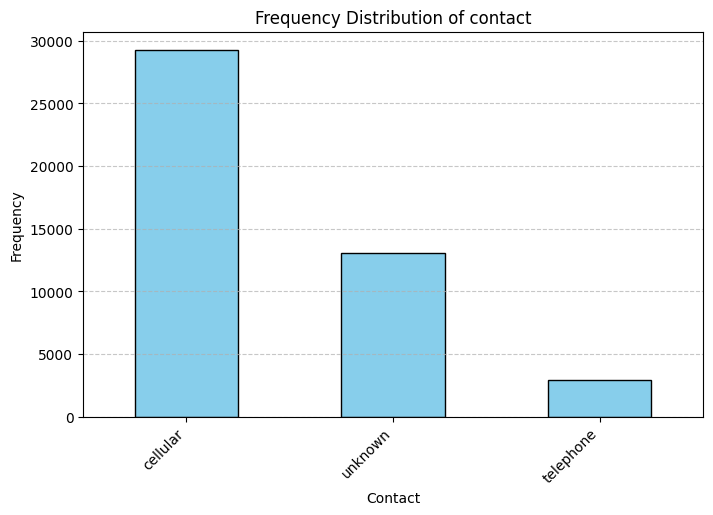

Column: poutcome
Counts:
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64
Percentages:
poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64




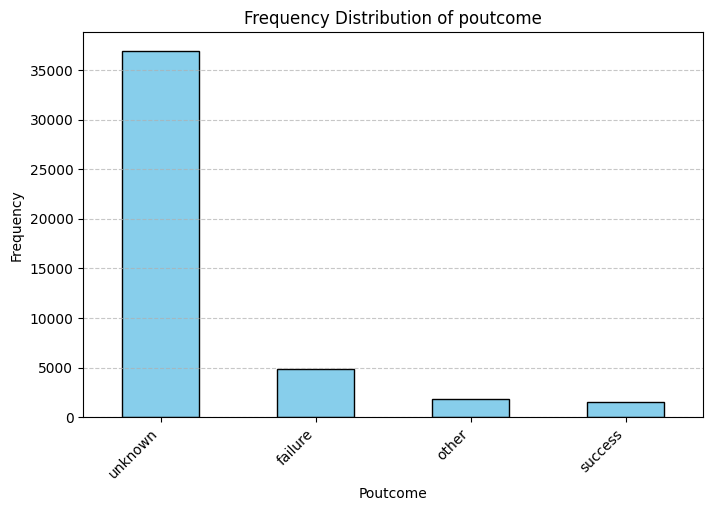

Column: education
Counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
Percentages:
education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64




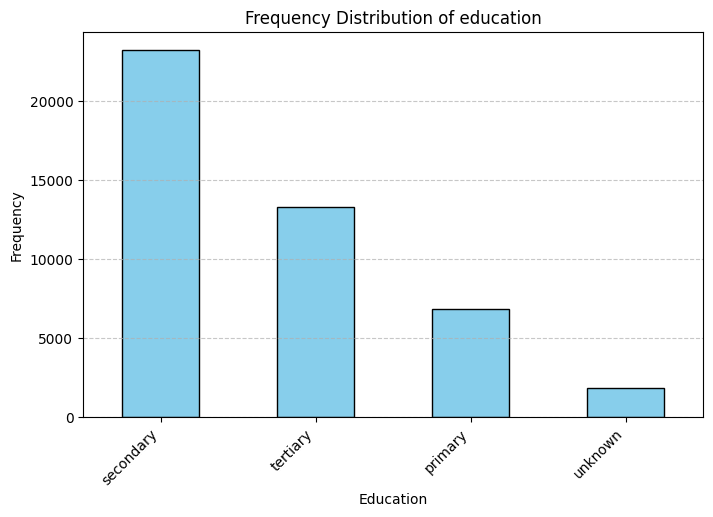

Column: contact
Counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
Percentages:
contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64




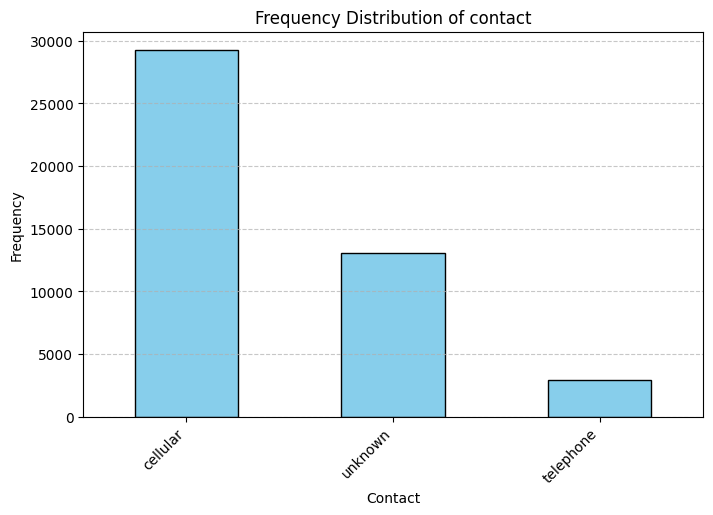

Column: month
Counts:
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
Percentages:
month
may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: proportion, dtype: float64




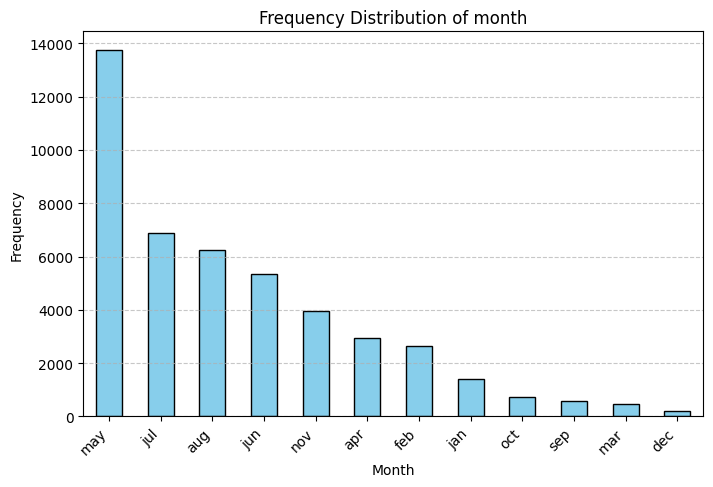

Column: y
Counts:
y
no     39922
yes     5289
Name: count, dtype: int64
Percentages:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64




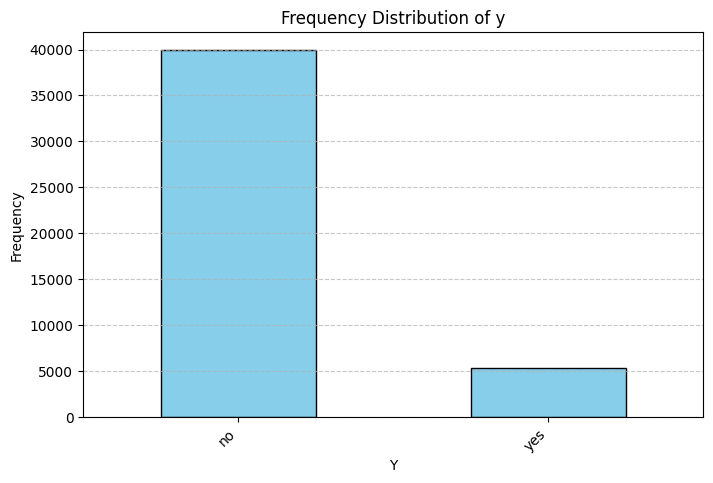

In [14]:
# List of categorical columns
categorical_columns = ['job', 'marital','housing','loan', 'contact', 'poutcome', 'education', 'contact', 'month', 'y']

# Iterate through each categorical column
for col in categorical_columns:
    # Calculate count and percentage
    counts = train_df[col].value_counts()
    percentages = train_df[col].value_counts(normalize=True) * 100
    
    # Print the results
    print(f"Column: {col}")
    print("Counts:")
    print(counts)
    print("Percentages:")
    print(percentages)
    print("\n")
    
    # Create bar plot
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#### Bi-variate Analysis


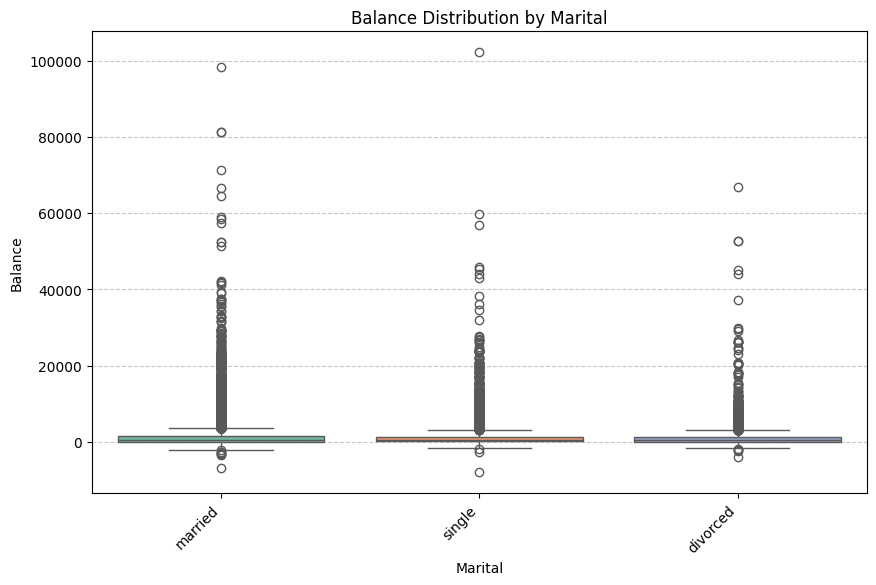

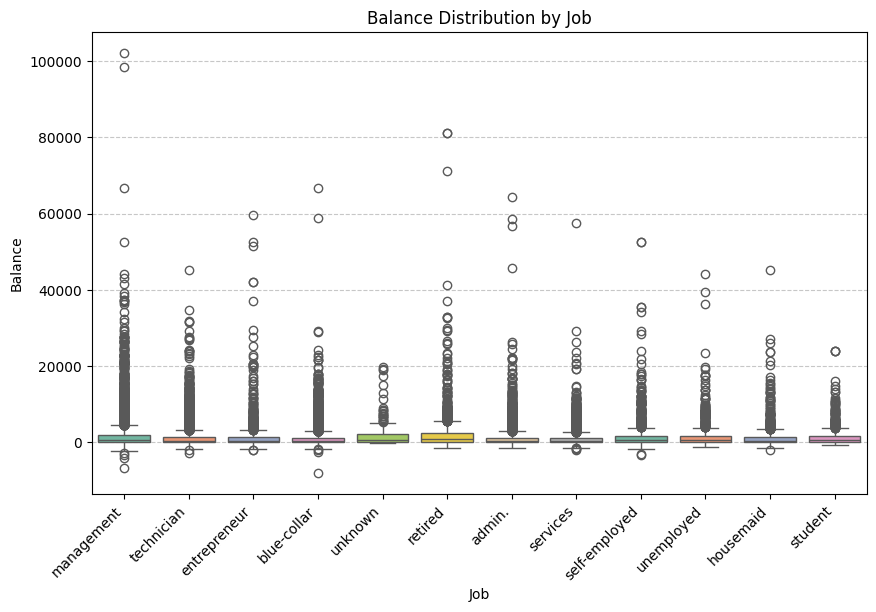

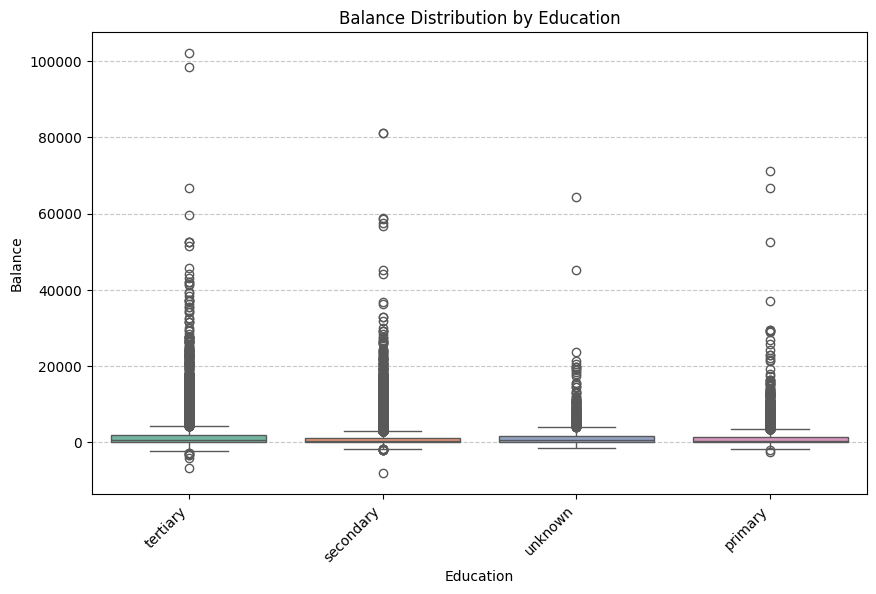

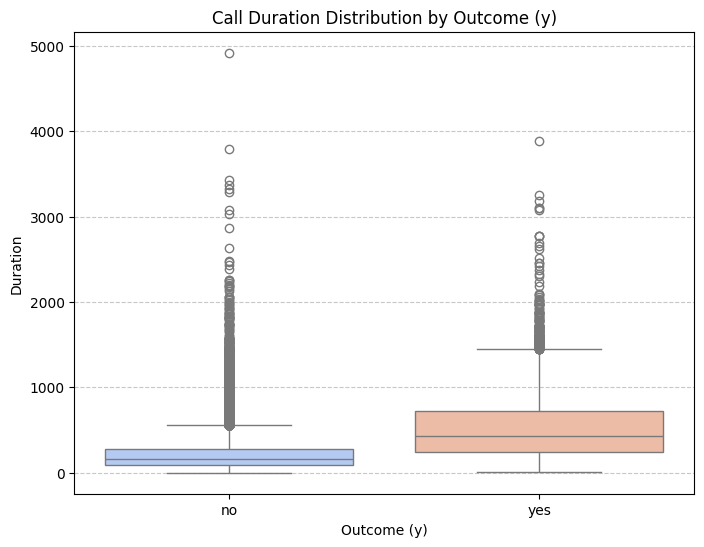

In [15]:
for col in ['marital', 'job', 'education']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x=col, y='balance', palette='Set2')
    plt.title(f'Balance Distribution by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Balance')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# --- Boxplot: Duration by y ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='y', y='duration', palette='coolwarm')
plt.title('Call Duration Distribution by Outcome (y)')
plt.xlabel('Outcome (y)')
plt.ylabel('Duration')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

y                    no   yes  Total  Subscription Rate (%)
balance_category                                           
Negative           3556   210   3766               5.576208
Positive          36366  5079  41445              12.254796


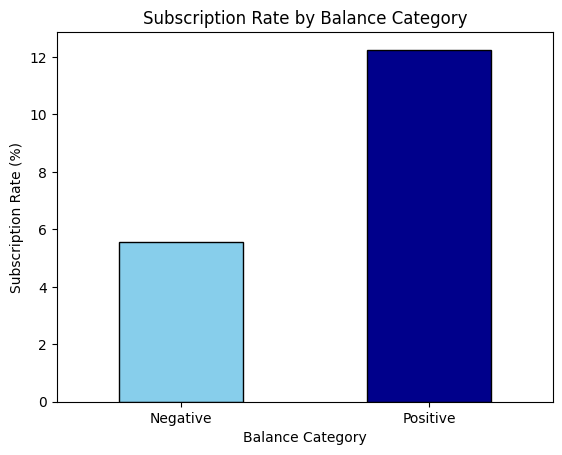

In [16]:
# Categorize balances into 'Negative' and 'Positive'
train_df['balance_category'] = train_df['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# Calculate subscription rates for each balance category
subscription_rate = train_df.groupby(['balance_category', 'y']).size().unstack().fillna(0)

# Calculate percentages
subscription_rate['Total'] = subscription_rate.sum(axis=1)
subscription_rate['Subscription Rate (%)'] = (subscription_rate['yes'] / subscription_rate['Total']) * 100

# Display results
print(subscription_rate)


subscription_rate['Subscription Rate (%)'].plot(kind='bar', color=['skyblue', 'darkblue'], edgecolor='black')
plt.title('Subscription Rate by Balance Category')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Balance Category')
plt.xticks(rotation=0)
plt.show()

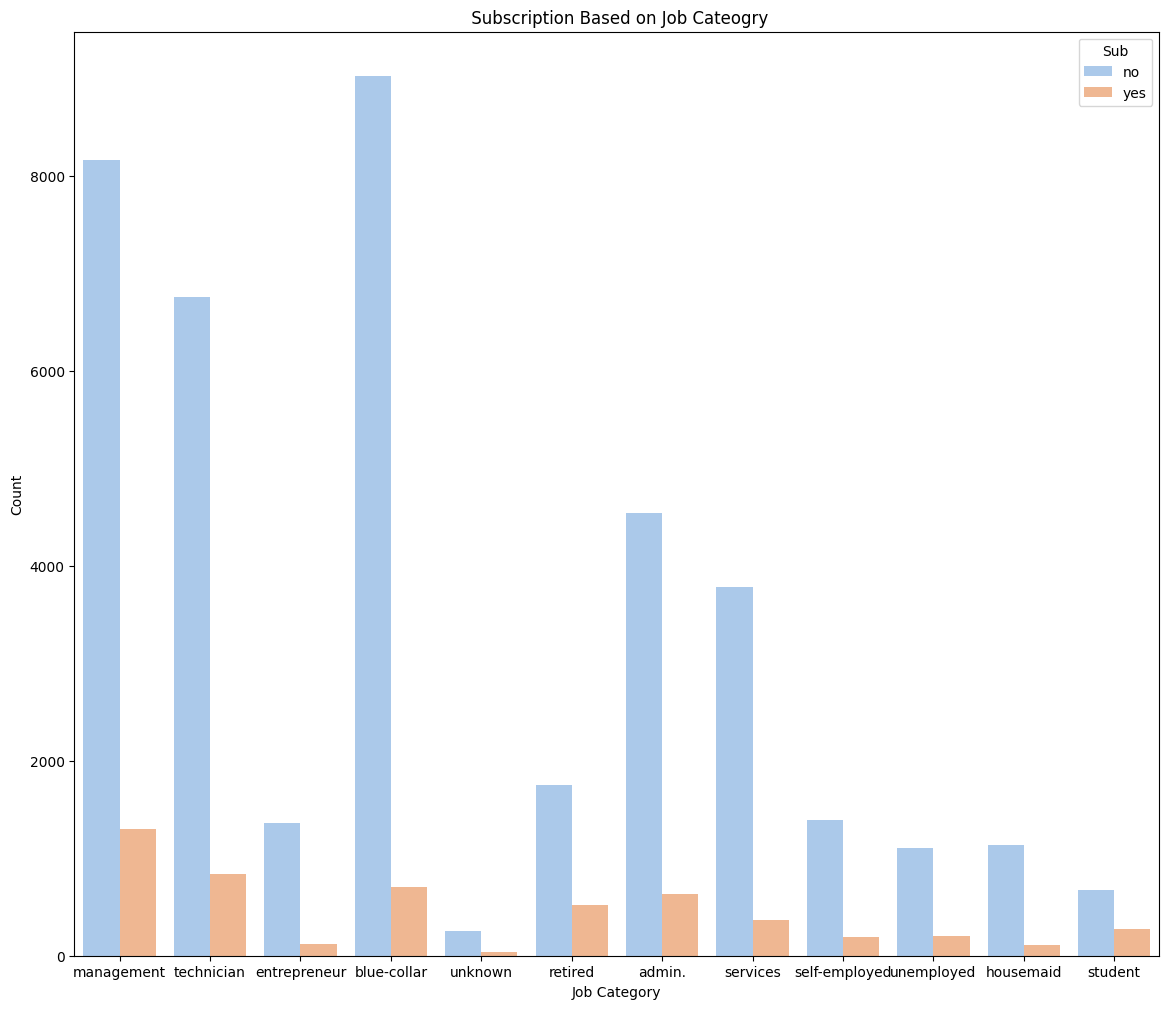

In [17]:
# Plotting the stacked bar chart
plt.figure(figsize=(14, 12))
sns.countplot(x='job', hue='y', data=train_df, palette='pastel')
plt.title(' Subscription Based on Job Cateogry')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.legend(title='Sub', loc='upper right')
plt.show()



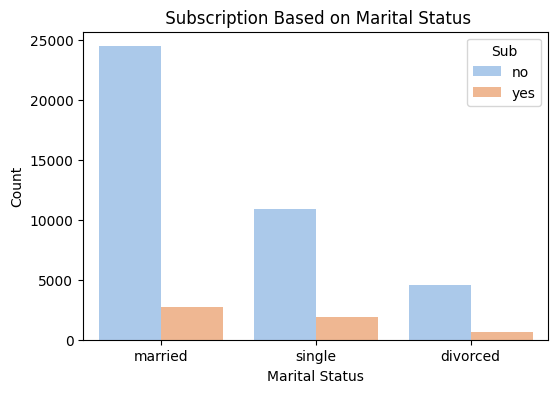

In [18]:
# Plotting the stacked bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='y', data=train_df, palette='pastel')
plt.title(' Subscription Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Sub', loc='upper right')
plt.show()



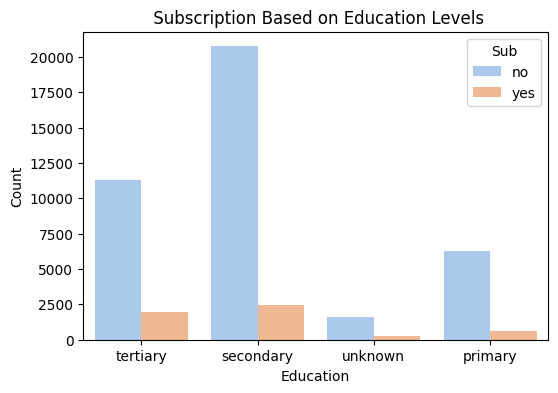

In [19]:
# Plotting the stacked bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='y', data=train_df, palette='pastel')
plt.title(' Subscription Based on Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Sub', loc='upper right')
plt.show()



plt.pair_plot(data=train_df,)

In [20]:
print(train_df['y'].value_counts())
train_df['y'].value_counts(normalize=True)  # Percentage distribution


y
no     39922
yes     5289
Name: count, dtype: int64


y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

#### *Multi-variate Analysis*

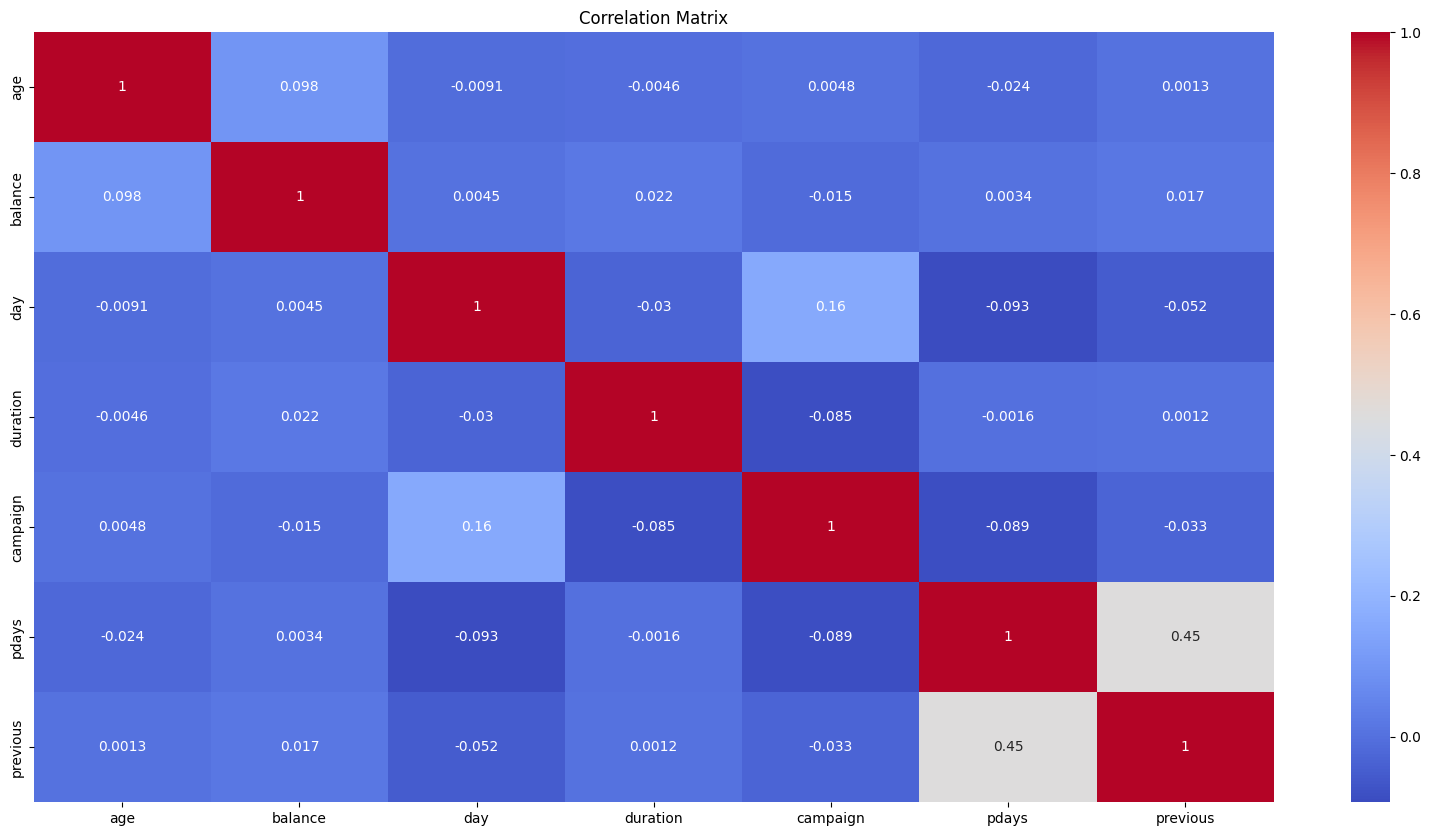

In [ ]:
# check for the relationship between each pair of numerical varibales using correlation matrix
numeric_df = train_df.select_dtypes(include=[np.number])
# drop index column
#numeric_df = numeric_df.drop(columns=['level_0','index'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()  



## *Hypothesis Testing*
#### H₀ (Null Hypothesis):
Client  attributes do not significantly influence the likelihood of subscribing to a term deposit.

#### H₁ (Alternative Hypothesis):
Client attributes significantly influence the likelihood of subscribing to a term deposit.


In [23]:
for var in categorical_columns:
    if var != 'y':  # Avoid checking 'y' against itself
        contingency_table = pd.crosstab(train_df[var], train_df['y'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\nAssociation between '{var}' and 'y':")
        print(f"P-value: {p}")
        if p < 0.05:
            print(f"-> Significant association between '{var}' and 'y'.")
        else:
            print(f"-> No significant association between '{var}' and 'y'.")


Association between 'job' and 'y':
P-value: 3.337121944935502e-172
-> Significant association between 'job' and 'y'.

Association between 'marital' and 'y':
P-value: 2.1450999986791792e-43
-> Significant association between 'marital' and 'y'.

Association between 'housing' and 'y':
P-value: 2.918797605076633e-192
-> Significant association between 'housing' and 'y'.

Association between 'loan' and 'y':
P-value: 1.665061163492756e-47
-> Significant association between 'loan' and 'y'.

Association between 'contact' and 'y':
P-value: 1.251738325340638e-225
-> Significant association between 'contact' and 'y'.

Association between 'poutcome' and 'y':
P-value: 0.0
-> Significant association between 'poutcome' and 'y'.

Association between 'education' and 'y':
P-value: 1.6266562124072994e-51
-> Significant association between 'education' and 'y'.

Association between 'contact' and 'y':
P-value: 1.251738325340638e-225
-> Significant association between 'contact' and 'y'.

Association between

In [25]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for var in numerical_columns:
    group_yes = train_df[train_df['y'] == 'yes'][var]
    group_no = train_df[train_df['y'] == 'no'][var]

    # Perform Mann-Whitney U Test
    u_stat, p_val = mannwhitneyu(group_yes, group_no, alternative='two-sided')
    print(f"\nVariable: {var}")
    print(f"U-statistic: {u_stat}, P-value: {p_val}")

    if p_val < 0.05:
        print(f"-> {var} is significantly associated with 'y'.")
    else:
        print(f"-> {var} is not significantly associated with 'y'.")


Variable: age
U-statistic: 103915109.5, P-value: 0.06281791018697587
-> age is not significantly associated with 'y'.

Variable: balance
U-statistic: 124589983.5, P-value: 6.593845808689515e-101
-> balance is significantly associated with 'y'.

Variable: day
U-statistic: 99974112.0, P-value: 3.326078633588937e-10
-> day is significantly associated with 'y'.

Variable: duration
U-statistic: 170521757.0, P-value: 0.0
-> duration is significantly associated with 'y'.

Variable: campaign
U-statistic: 90300543.5, P-value: 1.9484904873905108e-71
-> campaign is significantly associated with 'y'.

Variable: pdays
U-statistic: 125257746.5, P-value: 2.4841176503776935e-235
-> pdays is significantly associated with 'y'.

Variable: previous
U-statistic: 127174833.0, P-value: 3.491824260414992e-283
-> previous is significantly associated with 'y'.


## *Data Preprocessing*